
# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 4: Logistic Regression

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">



In [961]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- **This is an individual homework. No group collaboration.**
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

In [962]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile


import seaborn as sns
sns.set()


<div class='theme'> Cancer Classification from Gene Expressions </div>

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The data set is provided in the file `data/dataset_hw4.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The first column contains the cancer type, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use linear and logistic regression to build classification models for this data set. 


<div class='exercise'><b> Question 1 [20 pts]: Data Exploration </b></div>

First step is to  split  the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). Print dataset shape before splitting and after splitting. `Cancer_type` is our target column.


**1.1** Take a peek at your training set (show a glimpse of what you did): you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a data set? Explain in 3 or fewer sentences.


**1.3** Identify and report which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the data set).  Note: it wil lbe useful to save this list for future parts.

Plot two histograms ofyour best predictor - one using training and another for the testing dataset. Each histogram should clearly distinguish two different `Cancer_type` classes.

Hint: You may use t-testing to make this determination: #https://en.wikipedia.org/wiki/Welch%27s_t-test.


**1.4** Using your top gene from the previous part (call it  `best_predictor`), create a classification model by manually eye-balling a value for this gene that would discriminate the two classes the best. Justify your choice in 1-2 sentences. Report the accuracy of this hand-chosen model on the test set.

<hr> <hr>

<hr>
### Solutions

**First step is to split the observations into an approximate 80-20 train-test split. Below is some code to do this for you (we want to make sure everyone has the same splits). Print dataset shape before splitting and after splitting. `Cancer_type` is our target column.**

In [963]:
np.random.seed(10)
df = pd.read_csv('data/hw4_enhance.csv', index_col=0)


X_train, X_test, y_train, y_test =train_test_split(df.loc[:, df.columns != 'Cancer_type'], 
                                                         df.Cancer_type, test_size=0.2, 
                                                         random_state = 109, 
                                                         stratify = df.Cancer_type)

In [964]:

print(df.shape)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))


(752, 7130)
((601, 7129), (151, 7129), (601L,), (151L,))
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64


**1.1 Take a peek at your training set (show a glimpse of what you did): you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.**


In [965]:
#your code here
display(X_train.head())

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
486,-83.669345,-129.202197,91.188553,-132.634919,-416.659258,-566.248620,-549.255222,-208.415176,213.331881,-135.518811,...,111.849800,371.083898,252.006568,963.153393,9.955941,142.181944,442.730023,42.848269,512.106908,4.677488
604,-65.718571,-302.842019,-297.819728,-177.485917,-52.709137,-218.295750,195.983474,-268.235930,-328.630912,240.058672,...,252.867110,110.033722,203.197907,101.612259,-138.398658,245.767616,247.519122,-15.430358,-398.165984,-61.694246
341,-264.191248,-162.255274,127.997172,173.771779,-185.191211,40.011778,-1562.983106,-85.344926,-119.622143,219.619110,...,20.797496,-184.115075,-227.872398,140.876523,42.543763,28.594281,204.479474,9.831559,21.718266,19.522122
117,-92.558574,-109.788332,379.542547,391.641129,-184.507364,-577.178389,-293.421369,-372.534572,190.551199,-487.331438,...,180.678776,577.889184,-50.443125,417.586154,-11.190519,1478.997020,15.923333,112.986515,-107.706335,-25.673203
516,-143.099813,140.202023,-147.163850,222.339115,-231.007621,-753.616356,274.500343,-217.513332,-107.135509,-62.470938,...,139.821329,909.588696,43.531613,718.462679,-58.238405,232.494165,754.787059,-58.160474,1808.764690,-20.782346


In [966]:
#your code here
scaler=MinMaxScaler().fit(X_train)  ##https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

X_train_scaled=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

X_train_scaled.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
486,0.574689,0.652904,0.528552,0.202384,0.504132,0.309107,0.439480,0.524446,0.723161,0.411162,...,0.516278,0.391074,0.752595,0.484137,0.683508,0.389115,0.413169,0.562775,0.538180,0.524258
604,0.587407,0.535608,0.249427,0.171417,0.752874,0.513878,0.655342,0.464181,0.324602,0.559483,...,0.635019,0.317177,0.700050,0.336964,0.454571,0.406687,0.339430,0.452814,0.388218,0.380795
341,0.446787,0.630576,0.554963,0.413946,0.662329,0.665892,0.145850,0.648430,0.478307,0.551411,...,0.439609,0.233910,0.235984,0.343672,0.733797,0.369846,0.323172,0.500478,0.457391,0.556345
117,0.568391,0.666018,0.735454,0.564376,0.662796,0.302675,0.513584,0.359108,0.706408,0.272227,...,0.574234,0.449615,0.426995,0.390941,0.650875,0.615891,0.251946,0.695112,0.436069,0.458655
516,0.532581,0.834889,0.357527,0.447480,0.631015,0.198841,0.678084,0.515280,0.487490,0.440010,...,0.539831,0.543511,0.528163,0.442338,0.578272,0.404435,0.531047,0.372191,0.751796,0.469227


**1.2 The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a data set? Explain in 3 or fewer sentences.**

- When a training set contains more predictors than observations we cannot use the Least Square Regression. Therefore, in such cases we need to use regularization methods and introduce penalty terms


**1.3** **Identify and report which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the data set).  Note: it wil lbe useful to save this list for future parts.**

**Plot two histograms of your best predictor - one using training and another for the testing dataset. Each histogram should clearly distinguish two different `Cancer_type` classes.**

**Hint: You may use t-testing to make this determination: #https://en.wikipedia.org/wiki/Welch%27s_t-test.**

In [967]:
Cancer0 = df[df['Cancer_type']==0]
Cancer1 = df[df['Cancer_type']==1]
All_Genes = df.columns[1:]

ttest_List = []

for i in range(len(All_Genes)-1):
    ind_gene = All_Genes[i]
    mean_diff = Cancer0[ind_gene].mean() - Cancer1[ind_gene].mean()
    C0_var = Cancer0[ind_gene].std()**2/Cancer0[ind_gene].count()
    C1_var = Cancer1[ind_gene].std()**2/Cancer1[ind_gene].count()
    denominator = np.sqrt(C0_var + C1_var)
    ttest = mean_diff/denominator
    
    ttest_List.append(ttest)
#ttest_List

In [968]:
top10_gene_index = np.argsort(ttest_List)[-10:]
top10_gene = [X_train.columns[i] for i in top10_gene_index]

top_gene_index = np.argsort(ttest_List)[-1:]
top_gene = X_train.columns[top_gene_index][0]

In [969]:
#your code here
#logist_train_model1 = LogisticRegression(C=100000).fit(X_train_scaled,y_train)
#model1_abs_coef = np.abs(logist_train_model1.coef_)

#top10_gene_index = np.argsort(model1_abs_coef)[0][-10:]
#top10_gene = [X_train.columns[i] for i in top10_gene_index]

#top_gene_index = np.argsort(model1_abs_coef)[0][-1:]
#top_gene = X_train.columns[top_gene_index][0]

In [970]:
#your code here
print("Top Gene Predictor: \t{}\n".format(top_gene))
print("Top 10 Gene Predictors: \n{}".format(top10_gene));


Top Gene Predictor: 	M31523_at

Top 10 Gene Predictors: 
['U72936_s_at', 'M31211_s_at', 'X80230_at', 'U29175_at', 'X53742_at', 'J04615_at', 'X76648_at', 'J04029_s_at', 'Y08612_at', 'M31523_at']


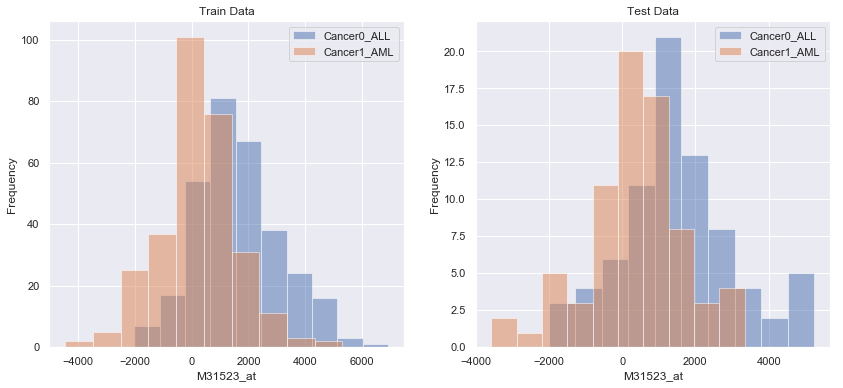

In [971]:
#0 indicating the ALL class and 1 indicating the AML

X_train_df = pd.DataFrame(list(zip(X_train[top_gene], y_train)),columns =[top_gene, 'Cancer_type']) 
TopGene_Cancer0_train = X_train_df[(X_train_df.Cancer_type == 0)][top_gene]
TopGene_Cancer1_train = X_train_df[(X_train_df.Cancer_type == 1)][top_gene]

X_test_df = pd.DataFrame(list(zip(X_test[top_gene], y_test)),columns =[top_gene, 'Cancer_type']) 
TopGene_Cancer0_test = X_test_df[(X_test_df.Cancer_type == 0)][top_gene]
TopGene_Cancer1_test = X_test_df[(X_test_df.Cancer_type == 1)][top_gene]

f,ax = plt.subplots(1,2, figsize=(14,6))
ax[0].hist(TopGene_Cancer0_train, alpha=0.5, label = 'Cancer0_ALL');
ax[0].hist(TopGene_Cancer1_train, alpha=0.5, label = 'Cancer1_AML');
ax[0].set_title('Train Data')
ax[0].set_xlabel(top_gene)
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(TopGene_Cancer0_test, alpha=0.5, label = 'Cancer0_ALL');
ax[1].hist(TopGene_Cancer1_test, alpha=0.5, label = 'Cancer1_AML');
ax[1].set_title('Test Data')
ax[1].set_xlabel(top_gene)
ax[1].set_ylabel('Frequency')
ax[1].legend()

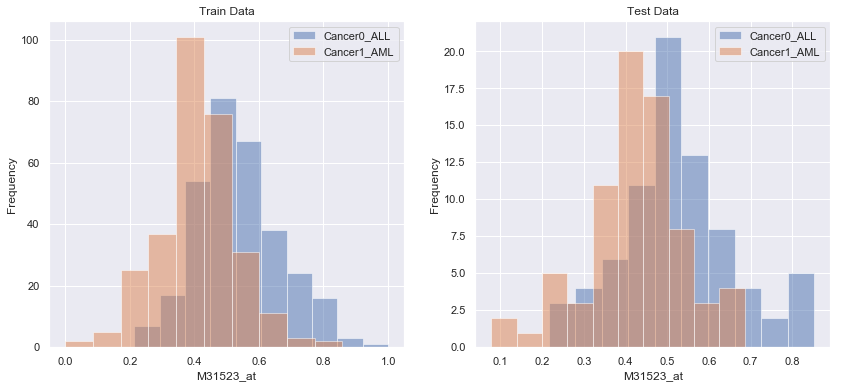

In [972]:
# Using Scaled Data
X_train_df = pd.DataFrame(list(zip(X_train_scaled[top_gene], y_train)),columns =[top_gene, 'Cancer_type']) 
TopGene_Cancer0_train = X_train_df[(X_train_df.Cancer_type == 0)][top_gene]
TopGene_Cancer1_train = X_train_df[(X_train_df.Cancer_type == 1)][top_gene]

X_test_df = pd.DataFrame(list(zip(X_test_scaled[top_gene], y_test)),columns =[top_gene, 'Cancer_type']) 
TopGene_Cancer0_test = X_test_df[(X_test_df.Cancer_type == 0)][top_gene]
TopGene_Cancer1_test = X_test_df[(X_test_df.Cancer_type == 1)][top_gene]

f,ax = plt.subplots(1,2, figsize=(14,6))
ax[0].hist(TopGene_Cancer0_train, alpha=0.5, label = 'Cancer0_ALL');
ax[0].hist(TopGene_Cancer1_train, alpha=0.5, label = 'Cancer1_AML');
ax[0].set_title('Train Data')
ax[0].set_xlabel(top_gene)
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(TopGene_Cancer0_test, alpha=0.5, label = 'Cancer0_ALL');
ax[1].hist(TopGene_Cancer1_test, alpha=0.5, label = 'Cancer1_AML');
ax[1].set_title('Test Data')
ax[1].set_xlabel(top_gene)
ax[1].set_ylabel('Frequency')
ax[1].legend()

**1.4 Using your top gene from the previous part (call it  `best_predictor`), create a classification model by eye-balling a value for this gene that would discriminate the two classes the best. Justify your choice in 1-2 sentences. Report the accuracy of this hand-chosen model on the test set.**


In [973]:
#your code here
best_predictor = top_gene

X_test_df['y_pred_test'] = ((X_test_df[top_gene] >= 0) * (X_test_df[top_gene] <= 0.5)).astype(float)
test_score = accuracy_score(y_test, X_test_df['y_pred_test'])*100

print("Training Set Accuracy: {}% \n".format(test_score))

print("It appears that scaled values between 0 and 0.5 of the {} gene predicts the existace of Cancer1 (AML)." 
       "Though it may not be wise to make this predictions based on one gene, if we have are given only this piece"
      "of information it's reasonable make these assumptions based on the probability at each gene level".format(top_gene))

Training Set Accuracy: 66.8874172185% 

It appears that scaled values between 0 and 0.5 of the M31523_at gene predicts the existace of Cancer1 (AML).Though it may not be wise to make this predictions based on one gene, if we have are given only this pieceof information it's reasonable make these assumptions based on the probability at each gene level


<div class='exercise'><b> Question 2 [25 pts]: Linear and Logistic Regression  </b></div>


In class we discussed how to use both linear regression and logistic regression for classification. For this question, you will work with a single gene predictor that you identify as the best predictor above to explore these two methods.

**2.1** Fit a simple linear regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. The scores predicted by the regression model for a patient could be interpreted as an estimate of the probability that the patient has Cancer_type=1 (AML). Is there a problem with this interpretation?


Create a figure with following items displayed on the same plot (use training data):
 - the predicted quantitative response from the linear regression model as a function of the best gene predictor
 - the true binary response. 


**2.2** Use your estimated linear regression model to classify observations into 0 and 1 using the standard Bayes' classifier.  Evaluate the classification accuracy of this classification model on both the training and test sets.


**2.3** Next, fit a simple logistic regression model to the training set. How do the training and test classification accuracies of this model compare with the linear regression model? 

Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to **not** regularize (use 'C=100000'). 


**2.4** 
Print and interpret the logistic regression coefficients: the 'slope' and intercept. 


Create 2 plots (one each for training and testing data) with 4 items displayed on each plot.
- the predicted quantitative response from the linear regression model as a function of the best gene predictor.
- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

Based on these plots, does one of the models appear better suited for binary classification than the other?  Explain in 3 sentences or fewer. 



<hr>
### Solutions

**2.1** **Fit a simple linear regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. The scores predicted by the regression model for a patient could be interpreted as an estimate of the probability that the patient has Cancer_type=1 (AML).  Is there a problem with this interpretation?**



In [974]:
import statsmodels.api as sm

In [975]:
# your code here

X_train_cst = sm.add_constant(X_train_scaled[best_predictor]) 
X_test_cst = sm.add_constant(X_test_scaled[best_predictor])

model_linear_sklearn = LinearRegression()
model_linear_sklearn.fit(X_train_cst, y_train)

y_pred_train = model_linear_sklearn.predict(X_train_cst)
y_pred_test = model_linear_sklearn.predict(X_test_cst)


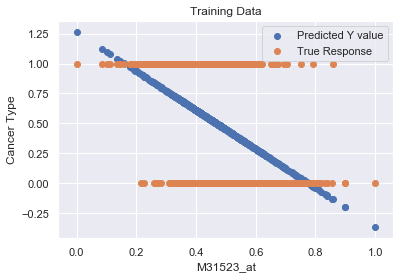

In [976]:
# your code here
#the predicted quantitative response from the linear regression model as a function of the best gene predictor
#the true binary response

plt.scatter(X_train_scaled[best_predictor], y_pred_train, label = 'Predicted Y value') 
plt.scatter(X_train_scaled[best_predictor], y_train, label = 'True Response') 
plt.xlabel(best_predictor) 
plt.ylabel("Cancer Type")
plt.title("Training Data")
plt.legend();


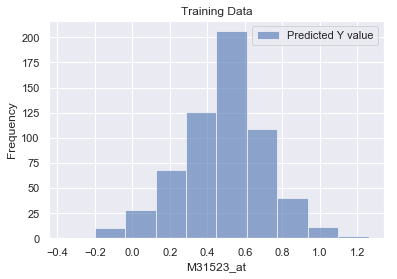

In [977]:
plt.hist(y_pred_train, alpha=0.6, label = 'Predicted Y value')  
plt.xlabel(best_predictor) 
plt.ylabel("Frequency")
plt.title("Training Data")
plt.legend();

- The limitation of using the predicted y values as the pprobability that patient has cancer is that there's no clear cut off point. Furthermore, since the existance of the cancer doesn't solely depend on this gene. Therefore, there's a chance that even though the predicted y value indicates that the probability of this patient having cancer as 0.3, However in reality the cancer can be present in that patient 


**2.2** **Use your estimated linear regression model to classify observations into 0 and 1 using the standard Bayes' classifier.  Evaluate the classification accuracy of this classification model on both the training and test sets.**

In [978]:
# your code here
classfy_train = (y_pred_train > 0.5).astype(int) 
classfy_test = (y_pred_test > 0.5).astype(int)

print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, classfy_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, classfy_test) * 100))

Accuracy for Training Data	: 70.8818635607
Accuracy for Testing Data	: 68.8741721854



**2.3** **Next, fit a simple logistic regression model to the training set. How do the training and test classification accuracies of this model compare with the linear regression model? Are the classifications substantially different?  Explain why this is the case.**

**Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to **not** regularize (use 'C=100000').

In [979]:
# your code here
Log_model1 = LogisticRegression(C=100000).fit(X_train_cst,y_train)

Log_model1_pred_train = Log_model1.predict(X_train_cst) 
Log_model1_pred_test = Log_model1.predict(X_test_cst)

print("Logistic Regression")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Log_model1_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Log_model1_pred_test) * 100))

print("\nLinear Regression")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, classfy_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, classfy_test) * 100))

Logistic Regression
Accuracy for Training Data	: 70.7154742097
Accuracy for Testing Data	: 70.8609271523

Linear Regression
Accuracy for Training Data	: 70.8818635607
Accuracy for Testing Data	: 68.8741721854


- The accuracy scores from both models are extremely similar. This is because we are using only one predictor to perform the model. Therefore, our linear estimates are pretty much the same


**2.4 Print and interpret the logistic regression coefficients: the 'slope' and the intercept.**

**Create 2 plots (with training and test data) with 4 items displayed on each plot.**
- the predicted quantitative response from the linear regression model as a function of the best gene predictor.
- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$.

**Based on these plots, does one of the models appear better suited for binary classification than the other?  Explain in 3 sentences or fewer.** 


In [980]:
print("Logistic Regression")
print("Intercept\t: {}".format(Log_model1.coef_[0][0]))
print("Slope\t\t: {}".format(Log_model1.coef_[0][1]))

Logistic Regression
Intercept	: 2.03863636916
Slope		: -8.75711199029


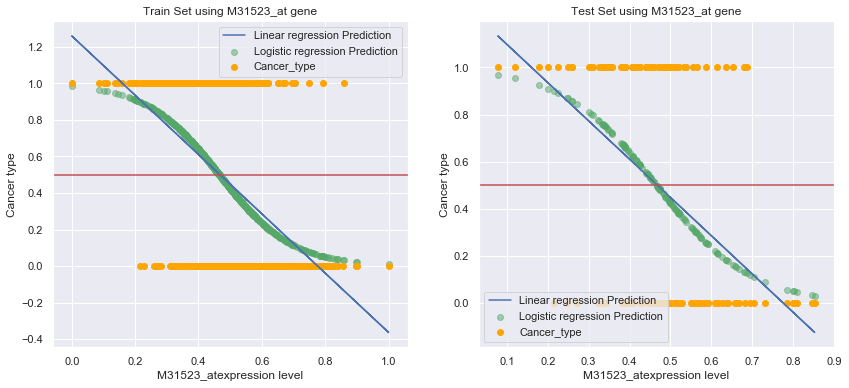

In [981]:
# your code here

f,ax = plt.subplots(1,2, figsize=(14,6))

#the predicted quantitative response from the linear regression model as a function of the best gene predictor.
ax[0].plot(X_train_scaled[best_predictor], y_pred_train, c="b", label = 'Linear regression Prediction')  
ax[1].plot(X_test_scaled[best_predictor], y_pred_test, c="b", label = 'Linear regression Prediction') 

#the predicted probabilities of the logistic regression model as a function of the best gene predictor.
Log_model1_predproba_train = Log_model1.predict_proba(X_train_cst)[:,1]
Log_model1_predproba_test = Log_model1.predict_proba(X_test_cst)[:,1]

ax[0].scatter(X_train_scaled[best_predictor], Log_model1_predproba_train, c="g", alpha = 0.5, label = 'Logistic regression Prediction') 
ax[1].scatter(X_test_scaled[best_predictor], Log_model1_predproba_test, c="g", alpha = 0.5, label = 'Logistic regression Prediction') 

#the true binary response.
ax[0].scatter(X_train_scaled[best_predictor], y_train, c="orange") 
ax[1].scatter(X_test_scaled[best_predictor], y_test, c="orange") 

#a horizontal line at  𝑦=0.5 .
ax[0].axhline(y=.5, c="r") 
ax[1].axhline(y=.5, c="r") 
            
# labels 
ax[0].set_title("Train Set using " + best_predictor + " gene") 
ax[0].set_xlabel(best_predictor + "expression level") 
ax[0].set_ylabel("Cancer type") 
ax[0].legend();

ax[1].set_title("Test Set using " + best_predictor + " gene") 
ax[1].set_xlabel(best_predictor + "expression level") 
ax[1].set_ylabel("Cancer type") 
ax[1].legend();

- Though Both the regressions appear to be extremely similar Logistic regression might be the best option because it has a boundary of 0-1.

<div class='exercise'> <b> Question 3 [20pts]: Multiple Logistic Regression </b> </div>


**3.1** Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in question 2 with a single gene (on both the training and test sets)?  


**3.2** How many of the coefficients estimated by this multiple logistic regression in the previous part are significantly different from zero at a *significance level of 5%*? Use the same value of C=100000 as before.

**Hint:** To answer this question, use *bootstrapping* with 100 bootstrap samples/iterations.  


**3.3** Comment on the classification accuracy of training and test set? Given the results above how would you assess the generalization capacity of your trained model? What other tests would you suggest to better guard against false sense of security on the accuracy of the model as a whole? 

**3.4** Now use regularization to improve predictions from the multiple logistic regression model.  Use LASSO-like regularization and cross-validation within the training set to tune the model.  Report the classification accuracy on both the training and test set.

**3.5** Do the 10 best predictors from Q1 hold up as important features in this regularized model?  If not, explain why this is the case (feel free to use the data to support your explanation).

<hr>
### Solutions

**3.1** **Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in question 2 with a single gene (on both the training and test sets)?**  


In [982]:
# your code here
X_train_cst = sm.add_constant(X_train) 
X_test_cst = sm.add_constant(X_test) 

Multi_Logistic_model = LogisticRegression(C=100000).fit(X_train_cst, y_train)
 
Multi_Logistic_pred_train = Multi_Logistic_model.predict(X_train_cst) 
Multi_Logistic_pred_test = Multi_Logistic_model.predict(X_test_cst)
 
print("Multiple Logistic Regression")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Multi_Logistic_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Multi_Logistic_pred_test) * 100))

print("\nLogistic Regression")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Log_model1_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Log_model1_pred_test) * 100))

Multiple Logistic Regression
Accuracy for Training Data	: 100.0
Accuracy for Testing Data	: 74.1721854305

Logistic Regression
Accuracy for Training Data	: 70.7154742097
Accuracy for Testing Data	: 70.8609271523


- Multiple logistic regression shows a significantly higher Accuracy score than the logistic regression performed with the single gene. However, this could be due to over fitting 


**3.2** **How many of the coefficients estimated by this multiple logistic regression in the previous part are significantly different from zero at a *significance level of 5%*? Use the same value of C=100000 as before.**

**Hint:** **To answer this question, use *bootstrapping* with 1000 bootstrap samples/iterations.**  


In [983]:
train_data = pd.concat([X_train,y_train], axis=1)

In [984]:
# your code here
model = LogisticRegression(C=100000).fit(X_train, y_train)
bootstrapping = 100
coef = np.zeros((bootstrapping, train_data.shape[1]-1))

for i in range(bootstrapping):   
    coef[i,:] = model.coef_

coef_count = 0
for i in range(coef.shape[1]):
    coeff_samples = coef[:,i]
    lower_bound = np.percentile(coeff_samples, 2.5)
    upper_bound = np.percentile(coeff_samples, 97.5) 
    if lower_bound>0 or upper_bound<0:
        coef_count += 1

print('Number coefficients different from zero at a significance level of 5%\t: {}'.format(coeffs_count))

Number coefficients different from zero at a significance level of 5%	: 546


**3.3 Open question: Comment on the classification accuracy of training and test set? Given the results above how would you assest the generalization capacity of your trained model? What other tests would you suggest to better guard against false sense of security on the accuracy of the model as a whole.**

- When performing Multiple logicstic Regression, we reached 100% accuracy with the training set. This suggest that we may have overfit the model. If we have more independent dataset we can run this model against that data to guage the accuracy. However, in order to better guard against the false sense of security on accuracy, we can plot the ROC curve

**3.4 Now use regularization to improve predictions from the multiple logistic regression model.  Use LASSO-like regularization and cross-validation within the training set to tune the model.  Report the classification accuracy on both the training and test set.**

In [985]:
# your code here
Log_RegCV=LogisticRegressionCV(multi_class='auto', penalty='l1', solver='liblinear').fit(X_train_cst,y_train)
Log_RegCV_predproba_train = Log_RegCV.predict_proba(X_train_cst)[:,1]

In [986]:
Log_RegCV_pred_train = Log_RegCV.predict(X_train_cst) 
Log_RegCV_pred_test = Log_RegCV.predict(X_test_cst)

print("Logistic Regression CV")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Log_RegCV_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Log_RegCV_pred_test) * 100))

Logistic Regression CV
Accuracy for Training Data	: 100.0
Accuracy for Testing Data	: 76.821192053


**3.5: Do the 10 best predictors from Q1 hold up as important features in this regularized model?  If not, explain why this is the case (feel free to use the data to support your explanation).**

In [987]:
# your code here
print("Top 10 Gene Predictors: \n{}".format(top10_gene));

Top 10 Gene Predictors: 
['U72936_s_at', 'M31211_s_at', 'X80230_at', 'U29175_at', 'X53742_at', 'J04615_at', 'X76648_at', 'J04029_s_at', 'Y08612_at', 'M31523_at']


In [988]:
# your code here
reg_top10_gene_index = np.argsort(np.abs(Log_RegCV.coef_[0]))[-10:]
reg_top10_gene_list = [X_train.columns[i] for i in reg_top10_gene_index]
print("Top 10 Gene Predictors using Regularized model: \n{}".format(reg_top10_gene_list));

Top 10 Gene Predictors using Regularized model: 
['HG881-HT881_at', 'M96980_at', 'HG4411-HT4681_at', 'M35296_at', 'X77794_at', 'L31881_at', 'X85753_at', 'M13232_s_at', 'U60325_at', 'X79204_at']


In [989]:
# your code here
priority_index_top10_gene = []
for i in top10_gene_index:
    x = len(Log_RegCV.coef_[0])-list(np.argsort(np.abs(Log_RegCV.coef_[0]))).index(i)
    priority_index_top10_gene.append(x)

print("Importance rating of the previously predicted Top10 genes with respect to the Regularized model : \n{}".format(priority_index_top10_gene));

Importance rating of the previously predicted Top10 genes with respect to the Regularized model : 
[2271, 5899, 2371, 2093, 6670, 922, 1857, 5740, 5060, 5553]


In [990]:
reg_top_gene_index = np.argsort(np.abs(Log_RegCV.coef_[0]))[-1:]
reg_top_gene_list = [X_train.columns[i] for i in reg_top_gene_index][0]
print("Top Gene Predictor using Regularized model: \t{}".format(reg_top_gene_list));

Top Gene Predictor using Regularized model: 	X79204_at


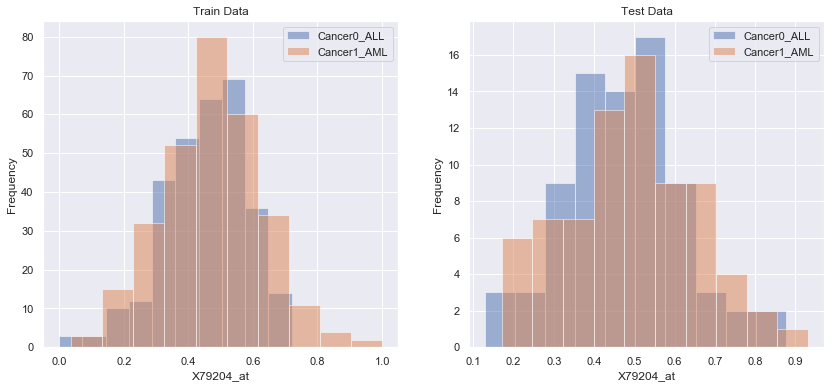

In [991]:
X_train_df = pd.DataFrame(list(zip(X_train_scaled[reg_top_gene_list], y_train)),columns =[reg_top_gene_list, 'Cancer_type']) 
TopGene_Cancer0_train = X_train_df[(X_train_df.Cancer_type == 0)][reg_top_gene_list]
TopGene_Cancer1_train = X_train_df[(X_train_df.Cancer_type == 1)][reg_top_gene_list]

X_test_df = pd.DataFrame(list(zip(X_test_scaled[reg_top_gene_list], y_test)),columns =[reg_top_gene_list, 'Cancer_type']) 
TopGene_Cancer0_test = X_test_df[(X_test_df.Cancer_type == 0)][reg_top_gene_list]
TopGene_Cancer1_test = X_test_df[(X_test_df.Cancer_type == 1)][reg_top_gene_list]

f,ax = plt.subplots(1,2, figsize=(14,6))
ax[0].hist(TopGene_Cancer0_train, alpha=0.5, label = 'Cancer0_ALL');
ax[0].hist(TopGene_Cancer1_train, alpha=0.5, label = 'Cancer1_AML');
ax[0].set_title('Train Data')
ax[0].set_xlabel(reg_top_gene_list)
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(TopGene_Cancer0_test, alpha=0.5, label = 'Cancer0_ALL');
ax[1].hist(TopGene_Cancer1_test, alpha=0.5, label = 'Cancer1_AML');
ax[1].set_title('Test Data')
ax[1].set_xlabel(reg_top_gene_list)
ax[1].set_ylabel('Frequency')
ax[1].legend();

- Previously predicted top10 Gene predictors are not equivalent to the Top10 predictors obtained from the regularized model. In fact, importance rating of the previously predicted Top10 genes with respect to the resularized model indicated that none of the previous predectors falls with the top 100 predictors. 
- Based on the accuracy scores of the initial model, I believe the regularized model predictors might actually be better at Cancer type prediction
- This might be due to making predictions using the linear regression model.


<div class='exercise'> <b> Question 4 [25pts]: Multi Class Log Regression </b> </div>

**4.1** Load the data from `hw4_mc_enhance.csv.zip` and examine its structure. How many instances of each class are there in our dataset? 

**4.2** Split the dataset into train and test, 80-20 split, random_state = 8. 

We are going to utilize these two features - 'M31523_at', 'X95735_at'.  Create a scatter plot of these two features using the training dataset.  It should be easily discernable via labeling/marking in the plot which observations belong to which `cancer_type`.

**4.3** Fit the following two models using crossvalidation: 
- Logistic Regression Multiclass model with linear features. 
- Logistic Regression Multiclass model with Polynomial features, degree = 2.

**4.4** Plot the decision boundaries for each model and interpret the results. Hint: You may utilize the function `overlay_decision_boundary`. 

**4.5** Report and plot the CV scores for the two models and interpret. 


<hr>
### Solutions

**4.1 Load the data from `hw4_mc_enhance.csv.zip` and examine its structure. How many instances of each class are there in our dataset?**

In [992]:
#your code here
mc_data = pd.read_csv('data/hw4_mc_enhance.csv', index_col=0)
mc_data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer_type
0,-1363.276427,-1058.585495,-541.469194,74.349803,-1110.082554,-1545.661845,-2037.029616,-1255.990888,-335.480958,-938.425691,...,1565.618803,-485.680714,-170.261227,-919.114293,1675.050053,389.769289,-526.449219,-268.963924,-779.643092,0.0
1,-796.285053,-1167.103365,7.538493,83.544731,-1116.432539,-1731.392100,249.376523,-1636.960108,-149.080421,-222.783440,...,622.498054,-1275.354673,214.828233,-750.220666,-441.589276,9.841713,-671.911209,-671.911209,-644.272577,0.0
2,-679.139168,-1069.832308,-690.301829,-112.075981,-1199.319178,-1286.387935,-605.465604,-1043.041921,-728.254877,388.011238,...,162.525483,-692.534361,517.498108,-674.674103,1265.396405,-65.192805,-714.859684,3672.066149,-822.021231,0.0
3,-1164.400197,-1109.939891,-990.127218,-238.574994,-1264.607160,-1218.860503,-1255.893511,-1009.732928,-521.768585,-926.953263,...,-31.625831,-621.975549,-458.594630,-630.689198,937.767618,-264.715941,-635.046022,475.944222,-794.070116,0.0
4,-1299.653758,-1401.998536,-1077.543813,-437.344560,-1386.755697,-1726.453259,-1499.988218,-1219.084464,-994.796971,-670.342247,...,383.591216,-905.517483,-36.675640,-1116.739685,316.087213,-210.879518,-953.423549,-291.448812,-1057.945876,0.0


In [993]:
#your code here 
mc_data.describe()
mc_data_isna_count = pd.DataFrame(mc_data.isna().sum())

print("Count of Null entries in the dataset:")
mc_data_isna_count[mc_data_isna_count[0]>0].count()

Count of Null entries in the dataset:


0    0
dtype: int64

In [994]:
display(mc_data.shape)
mc_data.groupby('cancer_type').count()

(750, 7130)

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
cancer_type,,,,,,,,,,,,,,,,,,,,,
0.0,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
1.0,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
2.0,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250


**4.2 Split the dataset into train and test, 80-20 split, random_state = 8.**

**We are going to utilize these two features - 'M31523_at', 'X95735_at'.  Create a scatter plot of these two features using training dataset.  We should be able to discern from the plot which sample belongs to which `cancer_type`.** 

In [995]:
# your code here
#train_data, test_data = train_test_split(mc_data, test_size=.2, random_state=8)
subset_data = pd.concat([mc_data['M31523_at'],mc_data['X95735_at'],mc_data['cancer_type']], axis=1)

X_train, X_test, y_train, y_test =train_test_split(subset_data.loc[:, subset_data.columns != 'cancer_type'], 
                                                         subset_data.cancer_type, test_size=0.2, 
                                                         random_state = 8, 
                                                         stratify = subset_data.cancer_type)

In [996]:
def create_scatterplot(dataset):
    ax=plt.gca()
    ax.set_xlabel("M31523_at")
    ax.set_ylabel("X95735_at")
    for i in range(0,4):  
        dataset_i = dataset[dataset['cancer_type']==i]
        ax.scatter(dataset_i["M31523_at"],dataset_i["X95735_at"])
    ax.legend(["0", "1", "2"],loc="right")
    return ax

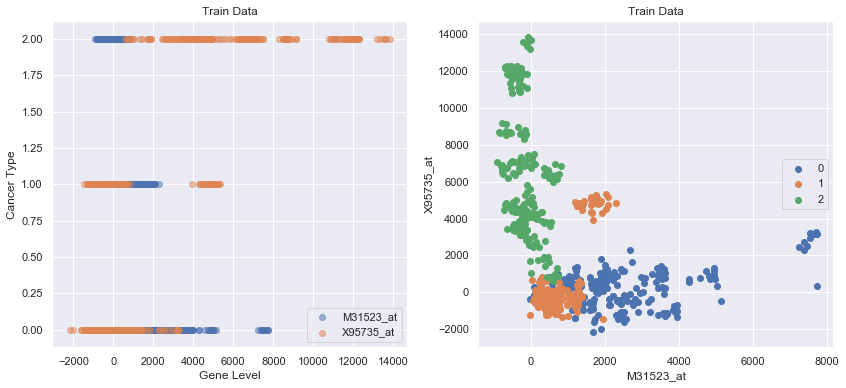

In [997]:
# your code here
f,ax = plt.subplots(1,2, figsize=(14,6))
ax[0].scatter(X_train['M31523_at'],y_train, alpha=0.5, label = 'M31523_at')
ax[0].scatter(X_train['X95735_at'],y_train, alpha=0.5, label = 'X95735_at')
ax[0].set_title('Train Data')
ax[0].set_xlabel('Gene Level')
ax[0].set_ylabel('Cancer Type')
ax[0].legend()

xy_train = pd.concat([X_train['M31523_at'],X_train['X95735_at'],y_train], axis=1)
#ax[1] = sns.scatterplot(x="M31523_at", y="X95735_at", hue=xy_train['cancer_type'], data=xy_train)
ax[1] = create_scatterplot(xy_train)
ax[1].set_title('Train Data');

#legend = ax[1].legend_
#labels=['0', '1', '2','2']
#for i, label in enumerate(labels):
#    legend.get_texts()[i+1].set_text(label)

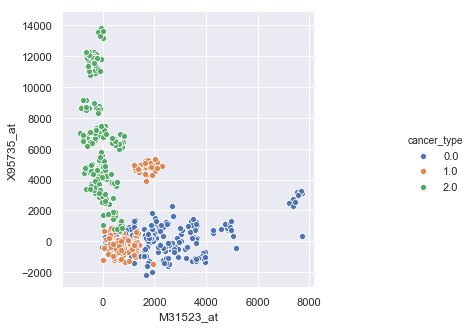

In [998]:
#sns.pairplot(xy_train, hue = 'cancer_type')
g  = sns.pairplot(xy_train, x_vars=["M31523_at"], y_vars=["X95735_at"], hue = 'cancer_type')
g.fig.set_size_inches(8,6)

**4.3  Fit the following two models using crossvalidation:**

**Logistic Regression Multiclass model with linear features.**

**Logistic Regression Multiclass model with Polynomial features, degree = 2.**


In [999]:
# your code here
scaler=MinMaxScaler().fit(X_train) 
X_train_scaled=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

X_train_cst = sm.add_constant(X_train_scaled) 
X_test_cst = sm.add_constant(X_test_scaled)

Multi_Log_RegCV=LogisticRegressionCV().fit(X_train_cst,y_train)
Multi_Log_RegCV_predproba_train = Multi_Log_RegCV.predict_proba(X_train_cst)[:,1]

Multi_Log_RegCV_pred_train = Multi_Log_RegCV.predict(X_train_cst) 
Multi_Log_RegCV_pred_test = Multi_Log_RegCV.predict(X_test_cst)

print("Multiclass Logistic Regression CV")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Multi_Log_RegCV_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Multi_Log_RegCV_pred_test) * 100))

Multiclass Logistic Regression CV
Accuracy for Training Data	: 84.8333333333
Accuracy for Testing Data	: 86.0


In [1000]:
# your code here
X_train_poly_cst=X_train_cst.copy()
X_train_poly_cst['M31523_at^2'] = X_train_cst['M31523_at']**2
X_train_poly_cst['X95735_at^2'] = X_train_cst['X95735_at']**2

X_test_poly_cst=X_test_cst.copy()
X_test_poly_cst['M31523_at^2'] = X_test_poly_cst['M31523_at']**2
X_test_poly_cst['X95735_at^2'] = X_test_poly_cst['X95735_at']**2

Multi_Log_RegCV_poly=LogisticRegressionCV().fit(X_train_poly_cst,y_train)
Multi_Log_RegCV_poly_predproba_train = Multi_Log_RegCV_poly.predict_proba(X_train_poly_cst)[:,1]

Multi_Log_RegCV_poly_pred_train = Multi_Log_RegCV_poly.predict(X_train_poly_cst) 
Multi_Log_RegCV_poly_pred_test = Multi_Log_RegCV_poly.predict(X_test_poly_cst)

print("Multiclass Logistic Regression CV with Polynomial features, degree = 2")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Multi_Log_RegCV_poly_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Multi_Log_RegCV_poly_pred_test) * 100))

Multiclass Logistic Regression CV with Polynomial features, degree = 2
Accuracy for Training Data	: 88.8333333333
Accuracy for Testing Data	: 90.6666666667


In [1010]:
# your code here
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_logreg_estimator = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression())

X_train_poly_cst=X_train_cst.copy()
X_train_poly_cst['M31523_at^2'] = X_train_cst['M31523_at']**2
X_train_poly_cst['X95735_at^2'] = X_train_cst['X95735_at']**2

X_test_poly_cst=X_test_cst.copy()
X_test_poly_cst['M31523_at^2'] = X_test_poly_cst['M31523_at']**2
X_test_poly_cst['X95735_at^2'] = X_test_poly_cst['X95735_at']**2

#Multi_Log_RegCV_poly.fit(X_train_poly_cst, y_train)
Multi_Log_RegCV_poly = polynomial_logreg_estimator.fit(X_train_poly_cst, y_train)

Multi_Log_RegCV_poly_pred_train = Multi_Log_RegCV_poly.predict(X_train_poly_cst)
Multi_Log_RegCV_poly_pred_test = Multi_Log_RegCV_poly.predict(X_test_poly_cst)

print("Multiclass Logistic Regression CV with Polynomial features, degree = 2 using make_pipeline")
print("Accuracy for Training Data\t: {}".format(accuracy_score(y_train, Multi_Log_RegCV_poly_pred_train) * 100))
print("Accuracy for Testing Data\t: {}".format(accuracy_score(y_test, Multi_Log_RegCV_poly_pred_test) * 100))

Multiclass Logistic Regression CV with Polynomial features, degree = 2 using make_pipeline
Accuracy for Training Data	: 83.1666666667
Accuracy for Testing Data	: 84.6666666667


**4.4 Plot the decision boundary and interpret results. Hint: You may utilize the function `overlay_decision_boundary`** 


In [1011]:
def overlay_decision_boundary(ax, model, colors=None, nx=200, ny=200, desaturate=.5, xlim=None, ylim=None):
    """
    A function that visualizes the decision boundaries of a classifier.
    
    ax: Matplotlib Axes to plot on
    model: Classifier to use.
     - if `model` has a `.predict` method, like an sklearn classifier, we call `model.predict(X)`
     - otherwise, we simply call `model(X)`
    colors: list or dict of colors to use. Use color `colors[i]` for class i.
     - If colors is not provided, uses the current color cycle
    nx, ny: number of mesh points to evaluated the classifier on
    desaturate: how much to desaturate each of the colors (for better contrast with the sample points)
    xlim, ylim: range to plot on. (If the default, None, is passed, the limits will be taken from `ax`.)
    """
    # Create mesh.
    xmin, xmax = ax.get_xlim() if xlim is None else xlim
    ymin, ymax = ax.get_ylim() if ylim is None else ylim
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny))
    X = np.c_[xx.flatten(), yy.flatten()]

    # Predict on mesh of points.
    model = getattr(model, 'predict', model)
    y = model(X)
    #print("Do I predict" , y)

    
    
#     y[np.where(y=='aml')]=3
#     y[np.where(y=='allT')]=2
#     y[np.where(y=='allB')]=1
    
    
    
    y = y.astype(int) # This may be necessary for 32-bit Python.
    y = y.reshape((nx, ny))

    # Generate colormap.
    if colors is None:
        # If colors not provided, use the current color cycle.
        # Shift the indices so that the lowest class actually predicted gets the first color.
        # ^ This is a bit magic, consider removing for next year.
        colors = (['white'] * np.min(y)) + sns.utils.get_color_cycle()

    if isinstance(colors, dict):
        missing_colors = [idx for idx in np.unique(y) if idx not in colors]
        #assert len(missing_colors) == 0, f"Color not specified for predictions {missing_colors}"

        # Make a list of colors, filling in items from the dict.
        color_list = ['white'] * (np.max(y) + 1)
        for idx, val in colors.items():
            color_list[idx] = val
    else:
        assert len(colors) >= np.max(y) + 1, "Insufficient colors passed for all predictions."
        color_list = colors
    color_list = [sns.utils.desaturate(color, desaturate) for color in color_list]
    cmap = matplotlib.colors.ListedColormap(color_list)

    # Plot decision surface
    ax.pcolormesh(xx, yy, y, zorder=-2, cmap=cmap, norm=matplotlib.colors.NoNorm(), vmin=0, vmax=y.max() + 1)
    xx = xx.reshape(nx, ny)
    yy = yy.reshape(nx, ny)
    if len(np.unique(y)) > 1:
        ax.contour(xx, yy, y, colors="black", linewidths=1, zorder=-1)
    else:
        print("Warning: only one class predicted, so not plotting contour lines.")

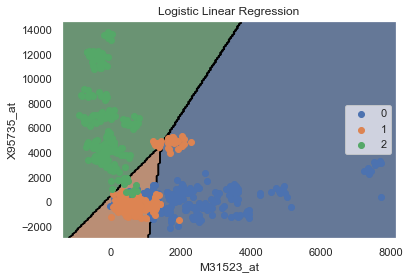

In [1012]:
# your code here
Multi_Log_RegCV=LogisticRegressionCV().fit(x_train,y_train)

ax=create_scatterplot(xy_train)
ax.set_title("Logistic Linear Regression")
overlay_decision_boundary(ax, Multi_Log_RegCV)

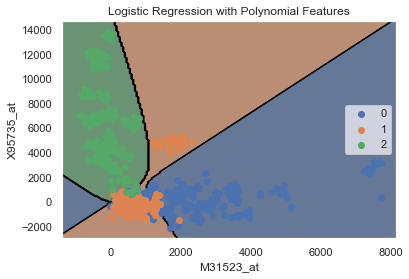

In [1013]:
# your code here
polynomial_logreg_estimator = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegressionCV())

Multi_Log_RegCV_poly = polynomial_logreg_estimator.fit(x_train, y_train)

ax=create_scatterplot(xy_train)
ax.set_title("Logistic Regression with Polynomial Features")

overlay_decision_boundary(ax, Multi_Log_RegCV_poly)

**4.5 Report and plot the CV scores for the two models and interpret.**

In [1014]:
print("Cross Validation Score of Linear Logistic Regression: \n {}"
      .format(cross_val_score(Multi_Log_RegCV, X_train_cst, y_train)))
print("\nCross Validation Score of Polynomial Logistic Regression: \n {}"
      .format(cross_val_score(Multi_Log_RegCV_poly, X_train_poly_cst, y_train)))

Cross Validation Score of Linear Logistic Regression: 
 [0.80597015 0.82089552 0.86868687]

Cross Validation Score of Polynomial Logistic Regression: 
 [0.91542289 0.86567164 0.94444444]


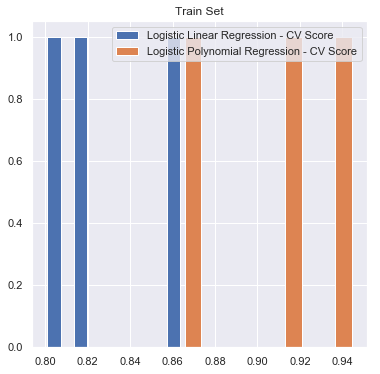

In [1015]:
# your code here
x_2_range  = np.arange(x_2_min, x_2_max, 0.003)

f,ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(cross_val_score(Multi_Log_RegCV, X_train, y_train), label= 'Logistic Linear Regression - CV Score')
ax.hist(cross_val_score(Multi_Log_RegCV_poly, X_train_poly_cst, y_train), label= 'Logistic Polynomial Regression - CV Score')
ax.set_title('Train Set')
ax.legend();

- Cross Validation scores of both models appear to be very similar. However, I failed to see the value in plotting the Cross Validation Scores

<div class='exercise'><b> Question 5: [10 pts] Including an 'abstain' option </b></div>

One of the reasons a hospital might be hesitant to use your cancer classification model is that a misdiagnosis by the model on a patient can sometimes prove to be very costly (e.g. if the patient were to file a law suit seeking a compensation for damages). One way to mitigate this concern is to allow the model to 'abstain' from making a prediction: whenever it is uncertain about the diagnosis for a patient. However, when the model abstains from making a prediction, the hospital will have to forward the patient to a specialist, which would incur additional cost.  How could one design a cancer classification model with an abstain option, such that the cost to the hospital is minimized?

*Hint:* Think of ways to build on top of the logistic regression model and have it abstain on patients who are difficult to classify.

**5.1** More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is $\$5000$ , and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model (without quadratic or interaction terms) from **Question 4**.  Note that this needs to be evaluated on the patients in the test set. 

**5.2** Design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient (certainly lower cost per patient than the logistic regression model).   Give a justification for your approach.

<hr>
### Solutions

**5.1 More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is $\$5000$ , and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model (without quadratic or interaction terms) from Question 4.  Note that this needs to be evaluated on the patients in the test set.**
**
...
**

*your answer here* 


In [1016]:
from sklearn.metrics import confusion_matrix

In [1017]:
# your code here 
Multi_Log_RegCV=LogisticRegressionCV(multi_class = "ovr").fit(X_train_cst,y_train)
Multi_Log_RegCV_predproba_test = Multi_Log_RegCV.predict_proba(X_test_cst)[:,1]

Multi_Log_RegCV_pred_train = Multi_Log_RegCV.predict(X_train_cst) 
Multi_Log_RegCV_pred_test = Multi_Log_RegCV.predict(X_test_cst)

confusion_matrix = pd.crosstab(  y_test.values.flatten(), 
                                          Multi_Log_RegCV_pred_test.flatten(), 
                                          rownames=['Actual Class'], 
                                          colnames=['Predicted Class'])
display(confusion_matrix)

incorrectPred = len(y_test) - (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2])

print("Using Test Data:")
print("Avg Cost per Patient using Accuracy Score\t: {}".format((1-(accuracy_score(y_test, Multi_Log_RegCV_pred_test))) * 5000))
print("Avg Cost per Patient using Confusion Matrix\t: {}".format(incorrectPred*5000/len(y_test)))

Predicted Class,0.0,1.0,2.0
Actual Class,,,
0.0,41,9,0
1.0,10,40,0
2.0,0,2,48


Using Test Data:
Avg Cost per Patient using Accuracy Score	: 700.0
Avg Cost per Patient using Confusion Matrix	: 700


**5.2 Design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient (certainly lower cost per patient than the logistic regression model).   Give a justification for your approach.**

In [1018]:
cost_abstain = 1000
cost_missPred = 5000
def cost_basedOn_prob(y_prob, y_values, p):
    y_thresh = []
    for prob in y_prob:
        if prob[0] >= p:
            y_thresh.append(1) #CancerType=0
        elif prob[1] >= p:
            y_thresh.append(2) #CancerType=1
        elif prob[2] >= p:
            y_thresh.append(3) #CancerType=2
        else:
            y_thresh.append(0) #abstain
    cost = 0
    for y_t, y in zip(y_thresh, y_values):
        if y_t == y: 
            cost += 0 
        elif y_t == 0:
            cost += cost_abstain
        else: 
            cost += cost_missPred
    return cost / len(y_values) 

In [1019]:
def probability_threshold(model, x, y_true):
    min_avg_cost = np.infty
    y_prob = model.predict_proba(x)
    
    best_prob = 0.5
    p = 0.5
    while p <= 1:
        avg_cost = cost_basedOn_prob(y_prob, y_true, p)
        if avg_cost < min_avg_cost:
            min_avg_cost = avg_cost
            best_prob = p
        
        p += 0.1 
    return best_prob, min_avg_cost

In [1020]:
# your code here
Multi_Log_RegCV_predproba_test = Multi_Log_RegCV.predict_proba(X_test_cst)
best_probability, min_avg_cost = probability_threshold(Multi_Log_RegCV, X_test_cst, y_test)
AvgCost_usingLinearLog_test = cost_basedOn_prob(Multi_Log_RegCV_predproba_test, y_test, best_probability)

print("Min avg. Cost per Patient using Linear Log. Reg\t: {}".format(AvgCost_usingLinearLog_test))

Min avg. Cost per Patient using Linear Log. Reg	: 666


In [1021]:
Multi_Log_RegCV_poly=LogisticRegressionCV(multi_class = "ovr").fit(X_train_poly_cst,y_train)
Multi_Log_RegCV_poly_predproba_test = Multi_Log_RegCV_poly.predict_proba(X_test_poly_cst)

best_probability, min_avg_cost = probability_threshold(Multi_Log_RegCV_poly, X_test_poly_cst, y_test)
AvgCost_usingPolyLog_test = cost_basedOn_prob(Multi_Log_RegCV_poly_predproba_test, y_test, best_probability)
print("Min avg. Cost per Patient using Poly. Log. Reg\t: {}".format(AvgCost_usingPolyLog_test))

Min avg. Cost per Patient using Poly. Log. Reg	: 666


In [1022]:
kNN = KNeighborsClassifier(n_neighbors=144).fit(X_train_cst, y_train)
kNN_predproba_test = kNN.predict_proba(X_test_cst)

best_probability, min_avg_cost = probability_threshold(kNN, X_test_cst, y_test)
AvgCost_usingkNN_test = cost_basedOn_prob(kNN_predproba_test, y_test, best_probability)
print("Min avg. Cost per Patient using kNN\t\t: {}".format(AvgCost_usingkNN_test))

Min avg. Cost per Patient using kNN		: 666


- In this method, we compared 3 models Linear Logistic Regression, Poly Logistic Regression and kNN model. Based on our calculations all three models returned the 666 as the minimum Avg cost per patient.

- These models were created by predicting the best probability of each model as a cut off threshold. I do suspect these can result in overfitting the models. However, in theoratical stand point these appear to be the min cost per patients 